# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [9]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

    

In [11]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


#### Drop user ID column

In [12]:
df.drop(columns=['User ID'])

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [13]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<AxesSubplot:>

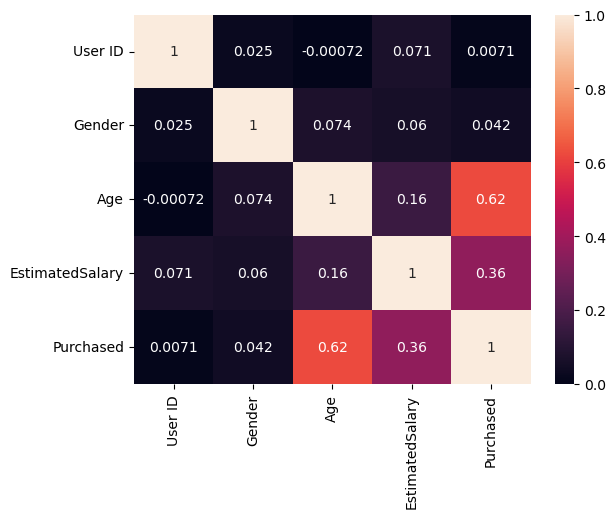

In [14]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

<AxesSubplot:xlabel='Gender', ylabel='count'>

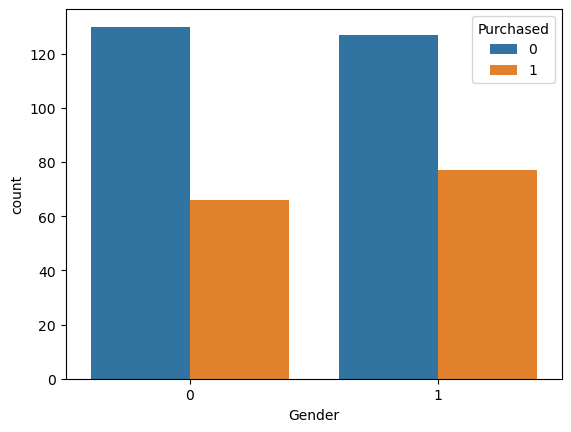

In [15]:
sns.countplot(x=df['Gender'],hue='Purchased',data=df)

### Plot a displot of Age

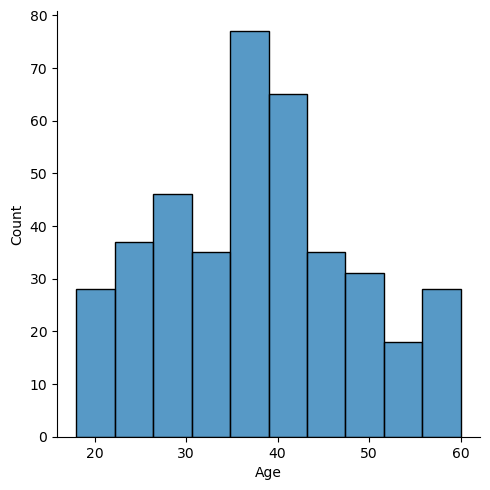

In [16]:
sns.displot(x='Age',data=df)

### Plot pairplot of the dataset

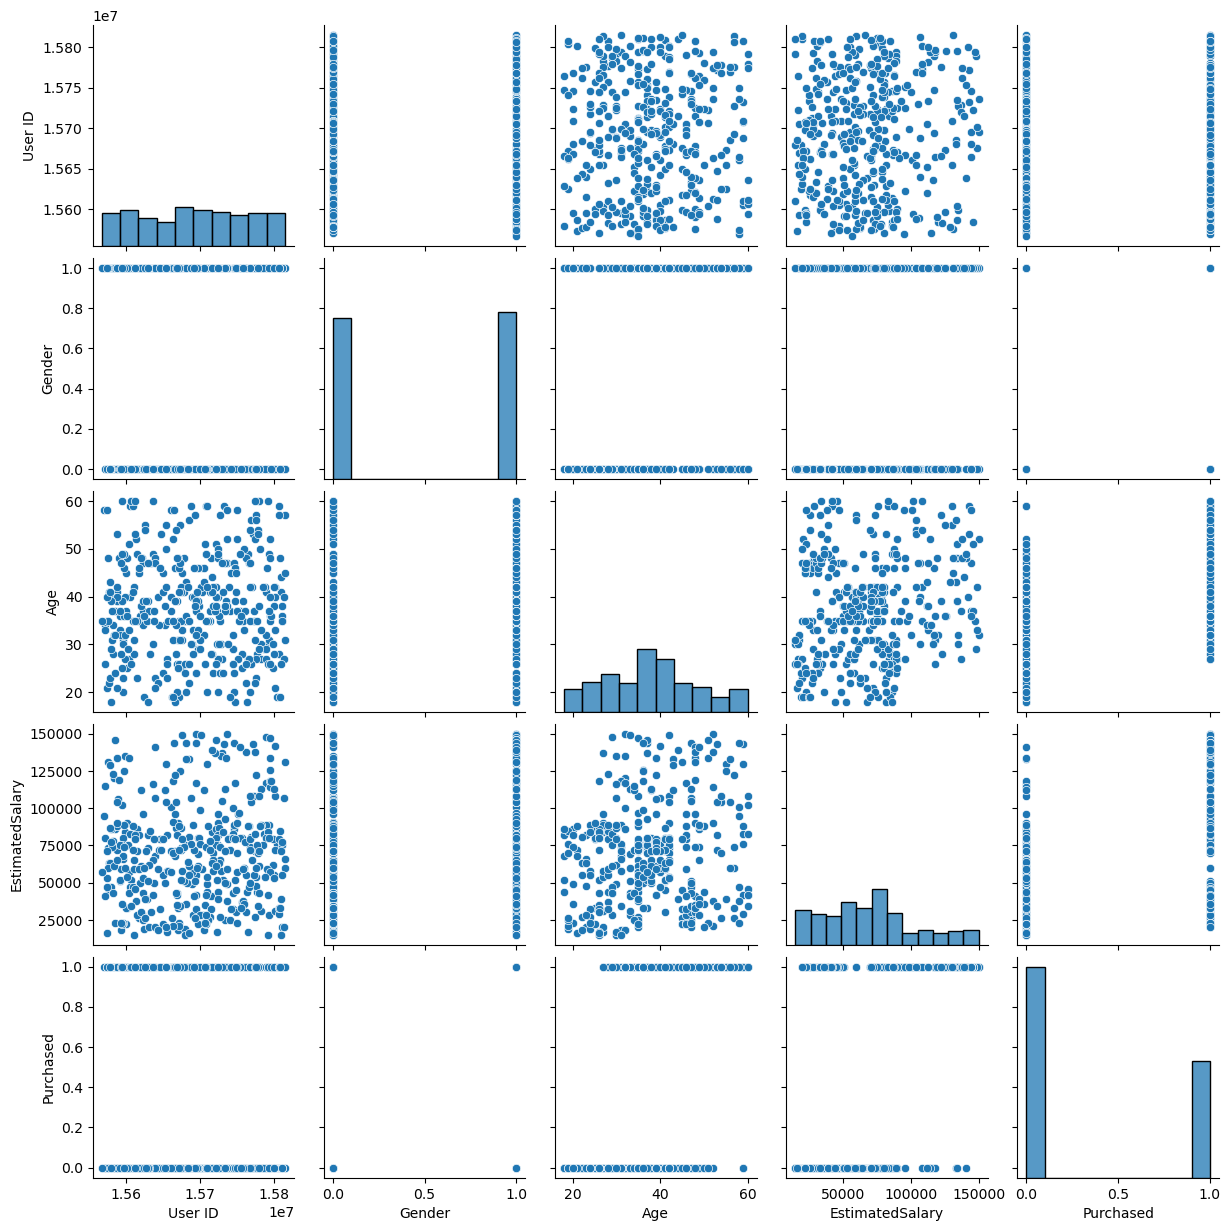

In [17]:
sns.pairplot(data=df)

## Data Preprocessing

### Split the dataset into input and target variables

In [18]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

### Scale the data using StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
x_scaled=scaler.fit_transform(x)

In [22]:
pd.DataFrame(x_scaled,columns=x.columns)

,User ID,Gender,Age,EstimatedSalary
0,-0.936579,-1.020204,-1.781797,-1.490046
1,1.668387,-1.020204,-0.253587,-1.460681
2,-0.320877,0.980196,-1.113206,-0.785290
3,-1.233692,0.980196,-1.017692,-0.374182
4,1.571389,-1.020204,-1.781797,0.183751
...,...,...,...,...
395,0.004517,0.980196,0.797057,-0.844019
396,0.203039,-1.020204,1.274623,-1.372587
397,-0.520392,0.980196,1.179110,-1.460681
398,0.886955,-1.020204,-0.158074,-1.078938


In [23]:
x.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000


### Split the dataset into training and testing set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Check shape of X_train and X_test

In [26]:
x_train.shape

(280, 4)

In [27]:
x_test.shape

(120, 4)

## ML Models

### Logistic Regression Classifier

In [28]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [29]:
model=LogisticRegression()

In [30]:
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=model.predict(x_test)

In [32]:
a=metrics.accuracy_score(y_test,y_pred)
a

0.7583333333333333

In [33]:
metrics.confusion_matrix(y_test,y_pred)

array([[73,  7],
       [22, 18]], dtype=int64)

<AxesSubplot:>

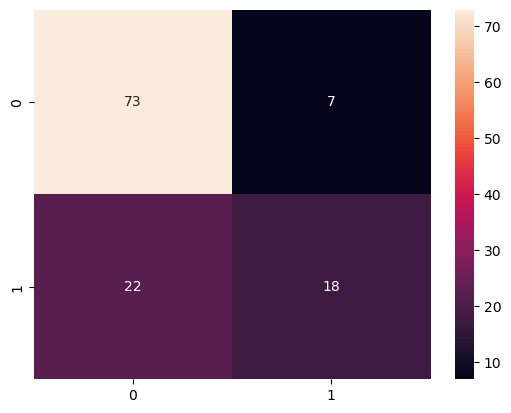

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model1=RandomForestClassifier(n_estimators=100)

In [37]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
b=model1.score(x_train,y_train)

In [39]:
y_pred=model1.predict(x_test)

In [40]:
metrics.accuracy_score(y_test,y_pred)

0.875

In [41]:
metrics.confusion_matrix(y_test,y_pred)

array([[69, 11],
       [ 4, 36]], dtype=int64)

<AxesSubplot:>

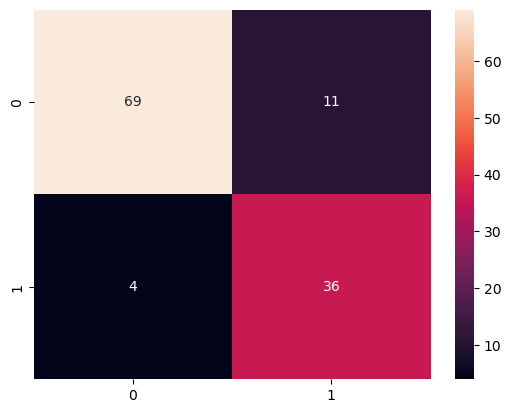

In [42]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Support Vector Machine

In [43]:
from sklearn.svm import SVC

In [44]:
model=SVC()

In [45]:
model.fit(x_train,y_train)

SVC()

In [46]:
c=model.score(x_train,y_train)
c

0.6321428571428571

In [47]:
y_pred=model.predict(x_test)

In [48]:
metrics.accuracy_score(y_test,y_pred)

0.6666666666666666

In [49]:
metrics.confusion_matrix(y_test,y_pred)

array([[80,  0],
       [40,  0]], dtype=int64)

<AxesSubplot:>

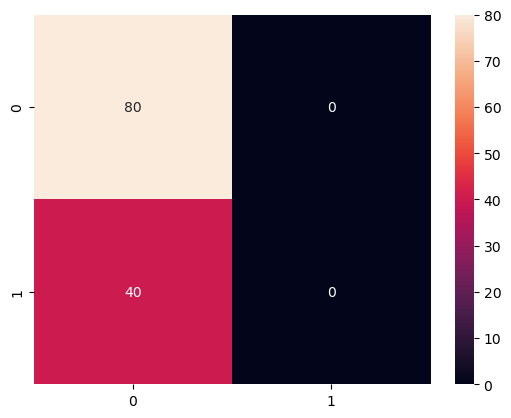

In [50]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Assign cross val scores of all models into a dataframe

In [51]:
asd=([a],[b],[c])
pd.DataFrame(asd)

,0
0,0.758333
1,1.000000
2,0.632143


***

## Deploy the model with highest score using Tkinter

In [52]:
x.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000


In [ ]:
### In this case its SVM Classifier
window=Tk()
window.title("Customer Behaviour Classification")
window.geometry("500x600")


window.mainloop()

#### Import all modules from Tkinter

In [54]:
from tkinter import *

### Define a function that will output to an entry box in Tkinter

In [ ]:
def getPrediction():
    age1=int(age.get())
    salary1=int(salary.get())
    
    resultbos.delete(0,END)
    
    if gfrnder.get()==1:
        male=1
        female=0
    else:
        male=0
        female=1
        
    result=model.predict(scaler.transform([[age1,salary1,female,male]]))
    
    if result[0]==1:
        resultbox.insert(0,'Purchased')
        elif result[0]==0:
            resultbox.insert(0,'Not Purchased')
            else
            resultbox.insert(0,'Error')


### Create Tkinter window with all necessary entryboxes and labels

In [ ]:
window=Tk()
window.gemoetry("350x600")
window.title("Social Networks Ads prediction")
label=Label(window,text='Enter the details here:',font=('calibre',10,'bold')).pack
agelabel=Label(window,text='Age')
age=Entry(window)
gender=StringVar()
gender.set(1)
genderlabel=Label(window,text='Gender')
agelabel.pack()
age.pack()
salarylabel.pack()
salary.pack()
genderlabel.pack()
Radiobutton(window,text='male',variable=gender,value=1).pack()
Radiobuttton(window,text='female',variable=gender,value=2).pack()
button=Button(window,text='Get Prediction',command=getPrediction).pack()
resultbox=Entry(window)
resultbox.pack()
window.mainloop()
        

***